In [12]:
import os
import random
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import tensorflow as tf
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import models
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
import os
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications.vgg19 import VGG19

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
train_loc = '/content/drive/MyDrive/data11/TrainingData'
vel_loc = '/content/drive/MyDrive/data11/val'
test_loc = "/content/drive/MyDrive/data11/Testing"


In [15]:
import random
SEED = 42 
np.random.seed(SEED) 
random.seed(SEED) 
tf.random.set_seed(SEED)

In [16]:

IMAGE_SIZE = [224, 224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [17]:
for layer in vgg.layers:
  layer.trainable = False

In [18]:
from glob import glob

folders = glob('/content/drive/MyDrive/data11/TrainingData/*')
print(len(folders))

4


In [19]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model2 = Model(inputs=vgg.input, outputs=prediction)
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [20]:
adam = tf.keras.optimizers.Adam()
model2.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [21]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_set = train_datagen.flow_from_directory(train_loc,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
vel_datagen = ImageDataGenerator(
    
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

vel_set = vel_datagen.flow_from_directory(vel_loc,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

test_datagen = ImageDataGenerator(
    
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_set = test_datagen.flow_from_directory(test_loc,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 4997 images belonging to 4 classes.
Found 1705 images belonging to 4 classes.
Found 706 images belonging to 4 classes.


In [22]:
model_history=model2.fit_generator(
  train_set,
  validation_data=vel_set,
  epochs=20,
  steps_per_epoch=5,
  validation_steps=32,
  verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
5/5 - 789s - loss: 4.0770 - accuracy: 0.4187 - val_loss: 4.6596 - val_accuracy: 0.4824 - 789s/epoch - 158s/step
Epoch 2/20
5/5 - 766s - loss: 2.4528 - accuracy: 0.6000 - val_loss: 3.0780 - val_accuracy: 0.5020 - 766s/epoch - 153s/step
Epoch 3/20
5/5 - 769s - loss: 2.4893 - accuracy: 0.6187 - val_loss: 3.5614 - val_accuracy: 0.5986 - 769s/epoch - 154s/step
Epoch 4/20
5/5 - 754s - loss: 1.8622 - accuracy: 0.6992 - val_loss: 2.3704 - val_accuracy: 0.6348 - 754s/epoch - 151s/step
Epoch 5/20
5/5 - 770s - loss: 1.8459 - accuracy: 0.6875 - val_loss: 2.4900 - val_accuracy: 0.6172 - 770s/epoch - 154s/step
Epoch 6/20
5/5 - 788s - loss: 1.5751 - accuracy: 0.7437 - val_loss: 2.2852 - val_accuracy: 0.6406 - 788s/epoch - 158s/step
Epoch 7/20
5/5 - 771s - loss: 1.1819 - accuracy: 0.7688 - val_loss: 2.1387 - val_accuracy: 0.6934 - 771s/epoch - 154s/step
Epoch 8/20
5/5 - 770s - loss: 1.3741 - accuracy: 0.7500 - val_loss: 2.0997 - val_accuracy: 0.7051 - 770s/epoch - 154s/step
Epoch 9/20
5/5 -

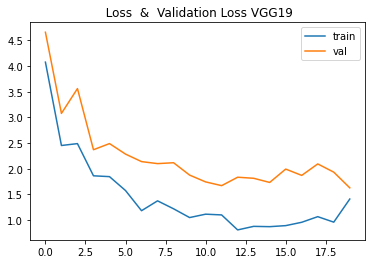

In [24]:
plt.plot(model_history.history['loss'], label = 'train')
plt.plot(model_history.history['val_loss'], label = 'val')
plt.title('  Loss  &  Validation Loss VGG19 ')
plt.legend()
plt.show()

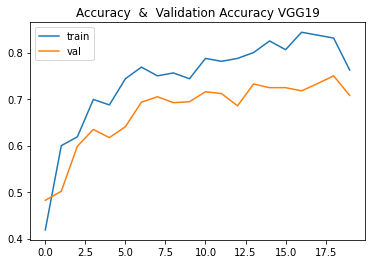

In [25]:
plt.plot(model_history.history['accuracy'], label = 'train')
plt.plot(model_history.history['val_accuracy'], label = 'val')
plt.title( 'Accuracy  &  Validation Accuracy VGG19')
plt.legend()
plt.show()